In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv('agricultural_yield.csv')

In [ ]:
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
x = data.drop('Yield_kg_per_hectare', axis=1)
y = data['Yield_kg_per_hectare']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.fit(x_train,y_train,epochs=30,batch_size=16)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2659.4424 - mae: 41.3987
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2535.6790 - mae: 40.3273
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2714.5339 - mae: 41.7442
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2551.2456 - mae: 40.1178
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2685.9849 - mae: 41.7063
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2569.9719 - mae: 40.6241
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2528.3044 - mae: 40.3408
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2623.4009 - mae: 40.9460
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2530.5662 - mae: 40.3933
Epoch 10/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2581.9241 - mae: 40.4067
Epoch 11/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2600.5291 - mae: 40.3855
Epoch 12/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)  # 20% for validation

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2689.7087 - mae: 41.4699 - val_loss: 2662.3733 - val_mae: 42.0071
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2745.9341 - mae: 42.1767 - val_loss: 2638.1199 - val_mae: 41.7631
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2606.1670 - mae: 40.5052 - val_loss: 2636.4487 - val_mae: 41.7699
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2832.9844 - mae: 42.3082 - val_loss: 2641.0640 - val_mae: 41.5688
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2552.2820 - mae: 40.3314 - val_loss: 2652.2476 - val_mae: 41.6823
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2725.1809 - mae: 41.6450 - val_loss: 2658.1665 - val_mae: 41.6734
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2663.6223 - mae: 41.0110 - val_loss: 2647.5454 - val_mae: 41.7295
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2559.6589 - mae: 40.4913 - val_loss: 2665.5339 - val_mae:

In [31]:
test_loss,test_mae = model.evaluate(x_test,y_test,verbose=1)
print(f"Test Mean Absolte Error: {test_mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2616.2302 - mae: 41.6599
Test Mean Absolte Error: 39.74


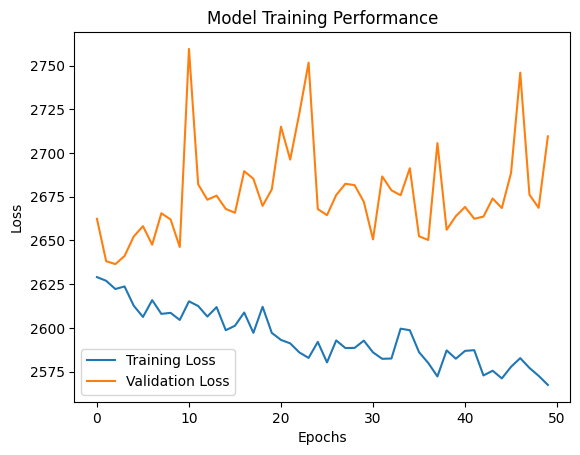

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


<ipython-input-39-5302adfa850d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-39-5302adfa850d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


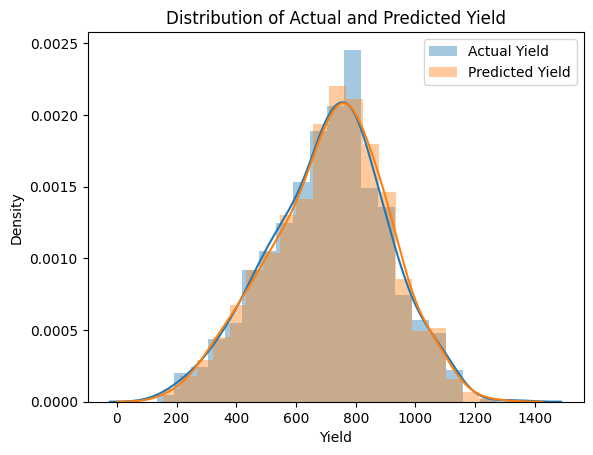

In [39]:
# Distribution plots
import seaborn as sns
y_pred = model.predict(x_test)
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


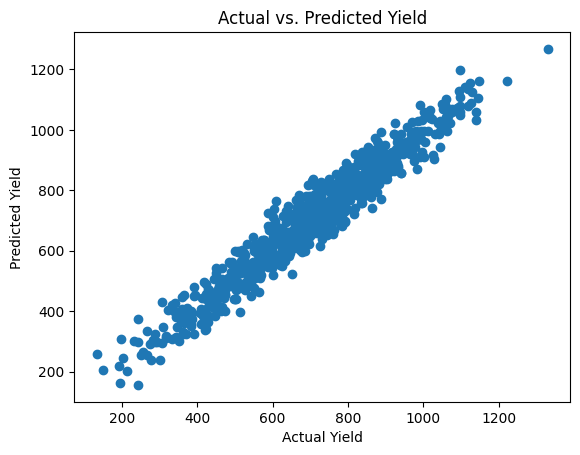

In [40]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Yield")
plt.show()